In [2]:
from sklearn import svm, metrics
import random, re
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from matplotlib import pyplot as plt
import mglearn
from matplotlib import font_manager, rc

#붓꽃 데이터 로딩
iris = datasets.load_iris()

# 2,3열만 선택 (3,4 번째 필드)
X = iris.data[:, [2, 3]]
y = iris.target

print(len(X))

150


In [11]:
# 데이터 셋 분리(7:3)
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=0)

#SVM 모델 생성
model = svm.SVC()

#데이터 학습
model.fit(X_train, y_train)
print("Accuracy for train data set: {:.3f}".format(model.score(X_train,y_train)))
print("Accuracy for test data set: {:.3f}".format(model.score(X_test,y_test)))

Accuracy for train data set: 0.971
Accuracy for test data set: 0.978


In [39]:
import random

#BMI를 계산해서 레이블을 리턴하는 함수
def calc_bmi(h, w):
    bmi = w / (h/100) **2
    if bmi < 18.5: return "thin"
    if bmi < 25: return "normal"
    return "fat"

#출력 파일 준비하기
fp = open("D:/data/bmi/bmi.csv","w",encoding="utf-8")
fp.write("height,weight,label\r\n")
#무작위로 데이터 생성하기
cnt = {"thin":0, "normal":0, "fat":0}
for i in range(30000):
    h = random.randint(120, 200)
    w = random.randint(35, 80)
    label = calc_bmi(h, w)
    cnt[label] += 1
    fp.write("{0},{1},{2}\r\n".format(h, w, label))
fp.close()
print("Generate the data set,", cnt)

Generate the data set, {'thin': 9696, 'normal': 8754, 'fat': 11550}


In [3]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

#데이터 로딩
tb1 = pd.read_csv("D:/data/bmi/bmi.csv") 

#열(column)을 자르고 정규화
label = tb1["label"]
w     = tb1["weight"] / 80 # 최대 100kg이라고 가정
h     = tb1["height"] / 200 # 최대 200cm라고 가정

#데이터 정규화 (0~1 사이의 값)
wh = pd.concat([w, h], axis=1)
#print(wh)

# 학습용 데이터셋과 검증용 데이터 셋으로 분리(75:25로 분리)
#ata_train, data_test, label_train, label_test = \
#   train_test_split(wh, label)

data_train, data_test, label_train, label_test = train_test_split(
    wh, label, test_size = 0.25, random_state=0)


#데이터 학습
clf = svm.SVC()
clf.fit(data_train, label_train)
#데이터 예측
predict = clf.predict(data_test)

print("Accuracy for train data: {:.3f}".format(clf.score(data_train,label_train)))
print("Accuracy for test data: {:.3f}".format(clf.score(data_test,label_test)))

#metrics  패키지에서 리포트
c1_report = metrics.classification_report(label_test, predict)
print("Report :\n", c1_report)



Accuracy for train data: 0.989
Accuracy for test data: 0.991
Report :
              precision    recall  f1-score   support

        fat       1.00      0.99      1.00      2908
     normal       0.98      0.99      0.99      2158
       thin       0.99      0.99      0.99      2434

avg / total       0.99      0.99      0.99      7500



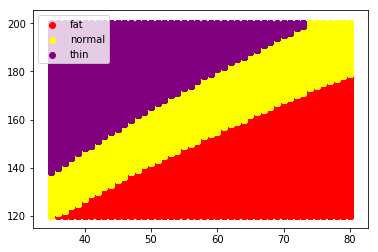

In [46]:
import matplotlib.pyplot as plt
import pandas as pd

# 판다스로 CSV 파일 로딩
tb1 = pd.read_csv("D:/data/bmi/bmi.csv", index_col = 2)

# 그래프 그리기
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 서브 플롯에 지정한 레이블을 임의의 색으로 칠하기
def scatter(lbl, color ):
    b = tb1.loc[lbl]
    ax.scatter(b["weight"],b["height"], c=color, label=lbl)
    
    
scatter("fat", "red")
scatter("normal", "yellow")
scatter("thin", "purple")
ax.legend(loc=2) # legend(범례)위치
plt.savefig("D:/data/bmi/bmi-result.png")
    